In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression, LassoLars, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy import stats
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_excel("tweets.xlsx",na_values=['none','None','NaN','N/A',' '])

In [3]:
print(data.shape)
print(data.columns)
data.head()

(42368, 32)
Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag',
       'TweetSource', 'TweetInReplyToStatusID', 'TweetInReplyToUserID',
       'TweetInReplyToScreenName', 'TweetRetweetCount', 'TweetFavoritesCount',
       'TweetHashtags', 'TweetPlaceID', 'TweetPlaceName', 'TweetPlaceFullName',
       'TweetCountry', 'TweetPlaceBoundingBox', 'TweetPlaceAttributes',
       'TweetPlaceContainedWithin', 'UserID', 'UserName', 'UserScreenName',
       'UserLocation', 'UserDescription', 'UserLink', 'UserExpandedLink',
       'UserFollowersCount', 'UserFriendsCount', 'UserListedCount',
       'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber',
       'tweet.place'],
      dtype='object')


,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [4]:
data.dtypes

TweetPostedTime               object
TweetID                        int64
TweetBody                     object
TweetRetweetFlag                bool
TweetSource                   object
TweetInReplyToStatusID       float64
TweetInReplyToUserID         float64
TweetInReplyToScreenName      object
TweetRetweetCount              int64
TweetFavoritesCount            int64
TweetHashtags                 object
TweetPlaceID                  object
TweetPlaceName                object
TweetPlaceFullName            object
TweetCountry                  object
TweetPlaceBoundingBox         object
TweetPlaceAttributes         float64
TweetPlaceContainedWithin    float64
UserID                         int64
UserName                      object
UserScreenName                object
UserLocation                  object
UserDescription               object
UserLink                      object
UserExpandedLink              object
UserFollowersCount             int64
UserFriendsCount               int64
U

In [5]:
data.isna().sum()

TweetPostedTime                  0
TweetID                          0
TweetBody                        0
TweetRetweetFlag                 0
TweetSource                      0
TweetInReplyToStatusID       42267
TweetInReplyToUserID         42179
TweetInReplyToScreenName     42179
TweetRetweetCount                0
TweetFavoritesCount              0
TweetHashtags                  100
TweetPlaceID                 41368
TweetPlaceName               41368
TweetPlaceFullName           41368
TweetCountry                 41369
TweetPlaceBoundingBox        41368
TweetPlaceAttributes         42368
TweetPlaceContainedWithin    42368
UserID                           0
UserName                         0
UserScreenName                   0
UserLocation                 16027
UserDescription               4365
UserLink                     25769
UserExpandedLink             25806
UserFollowersCount               0
UserFriendsCount                 0
UserListedCount                  0
UserSignupDate      

In [6]:
#Dropping columns which are having significant amount of null values

In [7]:
data.drop(['TweetInReplyToStatusID','TweetInReplyToUserID','TweetInReplyToScreenName','TweetPlaceID','TweetPlaceName',
            'UserLocation','UserLink','UserExpandedLink','TweetPlaceFullName','TweetCountry','TweetPlaceBoundingBox','TweetPlaceAttributes','TweetPlaceContainedWithin',
          'tweet.place','UserID'],axis=1,inplace=True)
data.shape

(42368, 17)

In [8]:
data.isna().sum()

TweetPostedTime            0
TweetID                    0
TweetBody                  0
TweetRetweetFlag           0
TweetSource                0
TweetRetweetCount          0
TweetFavoritesCount        0
TweetHashtags            100
UserName                   0
UserScreenName             0
UserDescription         4365
UserFollowersCount         0
UserFriendsCount           0
UserListedCount            0
UserSignupDate             0
UserTweetCount             0
MacroIterationNumber       0
dtype: int64

In [9]:
data1=data[['TweetRetweetFlag','UserFollowersCount','UserFriendsCount','UserTweetCount','MacroIterationNumber','TweetRetweetCount'
            ,'TweetFavoritesCount','UserListedCount']]


In [10]:
#Boxplot of the 8 columns which i took for seeing if there are iutliers

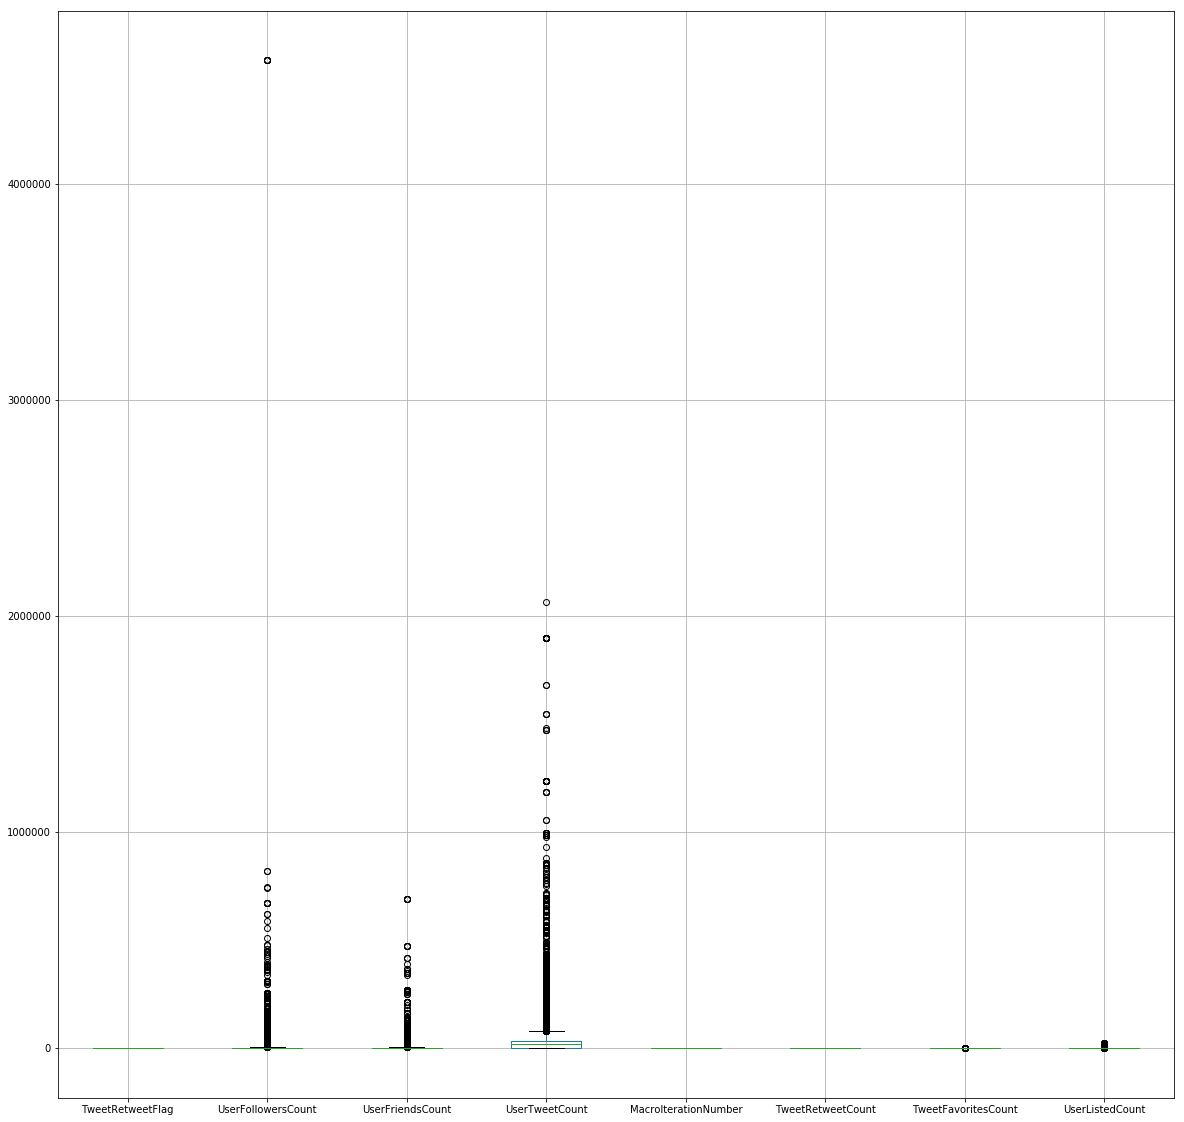

In [11]:
data1.boxplot(figsize=(20,20))

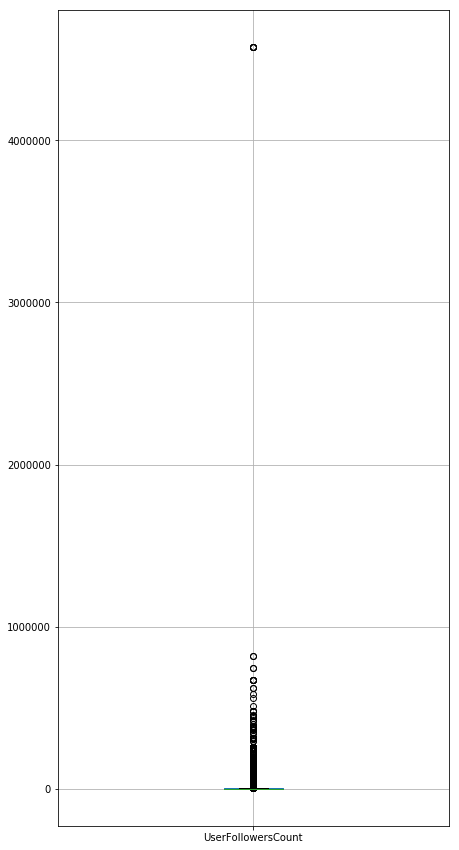

In [12]:
data1.boxplot(column='UserFollowersCount',figsize=(7,15))

In [13]:
print(data1.isna().sum())
print(data1.dtypes)

TweetRetweetFlag        0
UserFollowersCount      0
UserFriendsCount        0
UserTweetCount          0
MacroIterationNumber    0
TweetRetweetCount       0
TweetFavoritesCount     0
UserListedCount         0
dtype: int64
TweetRetweetFlag         bool
UserFollowersCount      int64
UserFriendsCount        int64
UserTweetCount          int64
MacroIterationNumber    int64
TweetRetweetCount       int64
TweetFavoritesCount     int64
UserListedCount         int64
dtype: object


In [14]:
#Checking the outliers

In [15]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
x=(data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))
#print(pd.value_counts(x.values.flatten()))
print(x)

TweetRetweetFlag            1.00
UserFollowersCount       1779.25
UserFriendsCount         1740.00
UserTweetCount          30480.50
MacroIterationNumber      222.00
TweetRetweetCount        3069.00
TweetFavoritesCount         0.00
UserListedCount           200.00
dtype: float64
       TweetRetweetFlag  UserFollowersCount  UserFriendsCount  UserTweetCount  \
0                 False                True              True           False   
1                 False               False             False           False   
2                 False                True              True            True   
3                 False                True              True           False   
4                 False               False             False           False   
5                 False               False             False           False   
6                 False               False             False           False   
7                 False               False             False           F

In [16]:
#Removing the outliers rows from the data

In [17]:
data2 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data2.shape

(30532, 8)

In [18]:
#Correlation before removing outliers

In [19]:
data.corr()

,TweetID,TweetRetweetFlag,TweetRetweetCount,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber
TweetID,1.000000,-0.101227,-0.208759,-0.004494,0.011612,0.021227,0.001735,-0.000294,-0.997624
TweetRetweetFlag,-0.101227,1.000000,0.572285,-0.028226,-0.059262,-0.086097,-0.088450,-0.082030,0.093954
TweetRetweetCount,-0.208759,0.572285,1.000000,0.013961,-0.080224,-0.143303,-0.243823,-0.108210,0.200852
TweetFavoritesCount,-0.004494,-0.028226,0.013961,1.000000,0.031358,0.018708,0.009973,-0.003033,0.005040
UserFollowersCount,0.011612,-0.059262,-0.080224,0.031358,1.000000,0.714140,0.493029,0.154184,-0.010877
UserFriendsCount,0.021227,-0.086097,-0.143303,0.018708,0.714140,1.000000,0.503876,0.352575,-0.020666
UserListedCount,0.001735,-0.088450,-0.243823,0.009973,0.493029,0.503876,1.000000,0.532808,0.001354
UserTweetCount,-0.000294,-0.082030,-0.108210,-0.003033,0.154184,0.352575,0.532808,1.000000,0.002116
MacroIterationNumber,-0.997624,0.093954,0.200852,0.005040,-0.010877,-0.020666,0.001354,0.002116,1.000000


In [20]:
#Correlation after remmoving outliers

In [21]:
data2.corr()

,TweetRetweetFlag,UserFollowersCount,UserFriendsCount,UserTweetCount,MacroIterationNumber,TweetRetweetCount,TweetFavoritesCount,UserListedCount
TweetRetweetFlag,1.000000,-0.383457,-0.299047,0.156767,0.111538,0.593528,NaN,-0.306657
UserFollowersCount,-0.383457,1.000000,0.705040,0.034977,-0.071736,-0.444437,NaN,0.541625
UserFriendsCount,-0.299047,0.705040,1.000000,-0.167236,-0.107925,-0.529263,NaN,0.352249
UserTweetCount,0.156767,0.034977,-0.167236,1.000000,0.170416,0.530360,NaN,0.205356
MacroIterationNumber,0.111538,-0.071736,-0.107925,0.170416,1.000000,0.250606,NaN,-0.048174
TweetRetweetCount,0.593528,-0.444437,-0.529263,0.530360,0.250606,1.000000,NaN,-0.328311
TweetFavoritesCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserListedCount,-0.306657,0.541625,0.352249,0.205356,-0.048174,-0.328311,NaN,1.000000


In [22]:
print(data2.shape)
print(data['TweetPostedTime'].shape)

(30532, 8)
(42368,)


In [23]:
#Coverting the date column into datetime datatype for selecting hour of each tweet which will be used for regression

In [24]:
df=data2
df["TweetPostedHour"]=pd.to_datetime(data["TweetPostedTime"])
df["TweetPostedHour"]=df['TweetPostedHour'].apply(lambda x:x.hour)

C:\Users\personal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\personal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
#Getting most popular 2000 hashtags and giving tag score for each tweet based on popular tags

In [26]:
hashtags = []
for i, h in enumerate(np.array(data['TweetHashtags'])):
    try:
        hashtags.append(h.split(','))
    except:
        pass

In [27]:
list_tags = [item.lower() for sublist in hashtags for item in sublist]
list_tags = [x.strip() for x in list_tags]
list_tags = [x.lower() for x in list_tags]
len(list_tags)

121500

In [28]:
set_tags=set(list_tags)
len(set_tags)

11387

In [29]:
counts = Counter(list_tags)
popular_tags = counts.most_common(2000)
popular_tags = [x[0] for x in popular_tags]

In [30]:
def getscore(hashtag):
    try:
        l = hashtag.split(',')
        l_strip = [x.strip() for x in l]
        l_strip = [x.lower() for x in l_strip]
        p = set(l_strip) & set(popular_tags)
        return len(p)
    except:
        return 0

In [31]:
df['tag_score'] = data['TweetHashtags'].apply(getscore)

C:\Users\personal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
#Like hashtag score similarly doing word score for tweet body

In [33]:
words = []
for i, h in enumerate(np.array(data['TweetBody'])):
    try:
        words.append(h.split(' '))
    except:
        pass

In [34]:
list_words = [item.lower() for sublist in words for item in sublist]
list_words = [x.strip() for x in list_words]
list_words = [x.lower() for x in list_words]
len(list_words)

665395

In [35]:
set_words=set(list_words)
len(set_words)

66508

In [36]:
#Removing stop words because they shouldn't get counted in popular words

In [37]:
stop_words=set(stopwords.words('english'))
len(stop_words)

179

In [38]:
filtered_words=set_words.difference(stop_words)

In [39]:
counts = Counter(list_words)
popular_words = counts.most_common(20000)
popular_words = [x[0] for x in popular_words]
len(popular_words)

20000

In [40]:
popular_words=set(popular_words).difference(stop_words)
len(popular_words)

19856

In [41]:
def get_bodyscore(hashtag):
    try:
        l = hashtag.split(',')
        l_strip = [x.strip() for x in l]
        l_strip = [x.lower() for x in l_strip]
        p = set(l_strip) & set(popular_words)
        return len(p)
    except:
        return 0

In [42]:
df['body_score'] = data['TweetBody'].apply(get_bodyscore)

C:\Users\personal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
#After adding tag score and body score columns seeing the correlation values

In [44]:
df.corr()

,TweetRetweetFlag,UserFollowersCount,UserFriendsCount,UserTweetCount,MacroIterationNumber,TweetRetweetCount,TweetFavoritesCount,UserListedCount,TweetPostedHour,tag_score,body_score
TweetRetweetFlag,1.000000,-0.383457,-0.299047,0.156767,0.111538,0.593528,NaN,-0.306657,-0.103925,-0.220603,0.168620
UserFollowersCount,-0.383457,1.000000,0.705040,0.034977,-0.071736,-0.444437,NaN,0.541625,0.064361,0.157098,-0.135037
UserFriendsCount,-0.299047,0.705040,1.000000,-0.167236,-0.107925,-0.529263,NaN,0.352249,0.098019,0.334729,-0.185463
UserTweetCount,0.156767,0.034977,-0.167236,1.000000,0.170416,0.530360,NaN,0.205356,-0.162130,-0.462787,0.182137
MacroIterationNumber,0.111538,-0.071736,-0.107925,0.170416,1.000000,0.250606,NaN,-0.048174,-0.992029,-0.168196,-0.150003
TweetRetweetCount,0.593528,-0.444437,-0.529263,0.530360,0.250606,1.000000,NaN,-0.328311,-0.233988,-0.563381,0.346277
TweetFavoritesCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserListedCount,-0.306657,0.541625,0.352249,0.205356,-0.048174,-0.328311,NaN,1.000000,0.039517,0.070083,-0.105606
TweetPostedHour,-0.103925,0.064361,0.098019,-0.162130,-0.992029,-0.233988,NaN,0.039517,1.000000,0.157206,0.157391
tag_score,-0.220603,0.157098,0.334729,-0.462787,-0.168196,-0.563381,NaN,0.070083,0.157206,1.000000,-0.216927


In [45]:
df.columns

Index(['TweetRetweetFlag', 'UserFollowersCount', 'UserFriendsCount',
       'UserTweetCount', 'MacroIterationNumber', 'TweetRetweetCount',
       'TweetFavoritesCount', 'UserListedCount', 'TweetPostedHour',
       'tag_score', 'body_score'],
      dtype='object')

In [46]:
df_filtered=df[['TweetPostedHour', 'tag_score','TweetRetweetFlag','TweetRetweetCount','body_score',
              'UserFollowersCount','UserFriendsCount','UserTweetCount','MacroIterationNumber']]

In [47]:
df_filtered.shape

(30532, 9)

In [48]:
x=df_filtered[['TweetPostedHour', 'tag_score','TweetRetweetFlag','body_score',
              'UserFollowersCount','UserFriendsCount','UserTweetCount','MacroIterationNumber']]
y=df_filtered['TweetRetweetCount']
x.shape

(30532, 8)

In [49]:
#Normalizing the values using standard scalar

In [50]:
scaler = StandardScaler()
scaler.fit(x)
z=scaler.transform(x)
x=pd.DataFrame(z,columns=['TweetPostedHour', 'tag_score','TweetRetweetFlag','body_score',
              'UserFollowersCount','UserFriendsCount','UserTweetCount','MacroIterationNumber'])
x.shape

(30532, 8)

In [51]:
print(x.shape,' ',
y.shape)

(30532, 8)   (30532,)


In [52]:
#Training-test split: arbitrary 70-30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [53]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)
print(lr.score(x_train, y_train))

[ 376.85807993 -316.60608687  536.2815578   235.22325409 -215.42885833
 -228.35890651  455.24415791  551.13634635] 1497.8077062062657
0.7297189024131914


In [54]:
#Training Decision Tree
model_dt = DecisionTreeRegressor(max_depth=4)
model_dt.fit(x_train, y_train)
print(model_dt.score(x_train, y_train))

0.987016611392877


In [55]:
#Training:
#Random Forest regression

rf = RandomForestRegressor(n_estimators=150, min_samples_split=4)
rf.fit(x_train, y_train)
print(rf.feature_importances_)
print(rf.score(x_train, y_train))

[0.00048425 0.47284685 0.05016182 0.00175086 0.02740879 0.41989477
 0.00778029 0.01967237]
0.9990804297330819


In [56]:
#testing the models
#linear regression
y_pred = lr.predict(x_test)
#Decision tree
y_pred_dt = model_dt.predict(x_test)
#random forest
y_pred_rf = rf.predict(x_test)

In [57]:
#measure of test set performance
#linear regression
print(lr.score(x_test, y_test))
#decision tree
print(model_dt.score(x_test, y_test))
#random forest
print(rf.score(x_test, y_test))

0.717233731784489
0.9829768425219365
0.9936108424140686


In [58]:
#linear regression
print(mean_squared_error(y_test,y_pred.round()))
#decision tree
print(mean_squared_error(y_test,y_pred_dt.round()))
#random forest
print(mean_squared_error(y_test,y_pred_rf.round()))

630360.6399563319
37949.675655021834
14244.485698689956


In [59]:
prediction=pd.DataFrame()
prediction['Actual']=y_test
prediction['y_pred_Reg']=y_pred.round()
prediction['y_pred_dt']=y_pred_dt.round()
prediction['y_pred_rf']=y_pred_rf.round()

In [60]:
#Prediction table for linear regression, Decision trees and Random forest

In [61]:
prediction

,Actual,y_pred_Reg,y_pred_dt,y_pred_rf
13944,4,819.0,42.0,16.0
36625,0,3.0,0.0,0.0
8804,219,477.0,420.0,221.0
16908,3241,2946.0,3127.0,3241.0
27109,3309,2683.0,3127.0,3309.0
26700,3309,2478.0,3127.0,3309.0
17653,3241,3042.0,3127.0,3241.0
30211,3228,2520.0,3127.0,3228.0
26143,3309,2233.0,3127.0,3306.0
17837,3241,3366.0,3127.0,3241.0


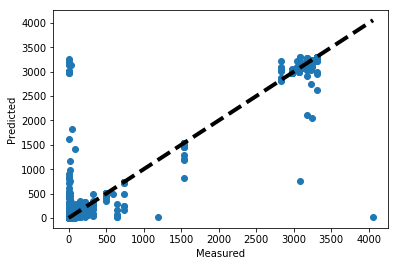

In [62]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [63]:
#Now trying to achieve further better results using Principal Component analysis 

In [64]:
pca = PCA()
principalComponents = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

In [65]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31301859, 0.23874335, 0.16340589, 0.09828895, 0.09056786,
       0.06367341, 0.03131905, 0.00098289])

In [66]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

In [67]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31301859, 0.23874335, 0.16340589, 0.09828895, 0.09056786,
       0.06367341])

In [68]:
#Training:
#Random Forest regression

rf = RandomForestRegressor(n_estimators=150, min_samples_split=4)
rf.fit(principalComponents, y_train)
print(rf.feature_importances_)
print(rf.score(principalComponents, y_train))

[0.70434318 0.11223596 0.10639152 0.04942643 0.01499346 0.01260944]
0.9983664514146475


In [69]:
y_pred_rf1 = rf.predict(pca_test)

In [70]:
print(rf.score(pca_test, y_test))
print(mean_squared_error(y_test,y_pred_rf1.round()))

0.9885831876917786
25451.677401746725
